In [1]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston,load_iris

In [3]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


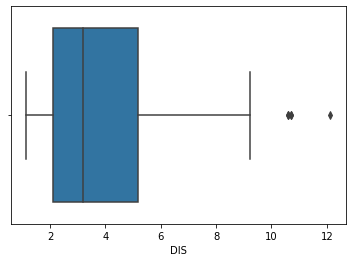

In [6]:
#Outlier detection

import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

In [7]:
Q1 = boston_df['DIS'].quantile(0.25)
Q3 = boston_df['DIS'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)


2.100175
5.1884250000000005
3.0882500000000004


In [8]:
print(boston_df['DIS'] < (Q1 - 1.5 * IQR))

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool


In [9]:
print(boston_df['DIS'] > (Q3 + 1.5 * IQR))


0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool


In [31]:
#Equal frequency binning
    pd.qcut(boston_df['TAX'], q=4)

0        (279.0, 330.0]
1      (186.999, 279.0]
2      (186.999, 279.0]
3      (186.999, 279.0]
4      (186.999, 279.0]
             ...       
501    (186.999, 279.0]
502    (186.999, 279.0]
503    (186.999, 279.0]
504    (186.999, 279.0]
505    (186.999, 279.0]
Name: TAX, Length: 506, dtype: category
Categories (4, interval[float64]): [(186.999, 279.0] < (279.0, 330.0] < (330.0, 666.0] < (666.0, 711.0]]

In [32]:
#Equal width binning
pd.cut(boston_df['TAX'], bins=4)

0      (186.476, 318.0]
1      (186.476, 318.0]
2      (186.476, 318.0]
3      (186.476, 318.0]
4      (186.476, 318.0]
             ...       
501    (186.476, 318.0]
502    (186.476, 318.0]
503    (186.476, 318.0]
504    (186.476, 318.0]
505    (186.476, 318.0]
Name: TAX, Length: 506, dtype: category
Categories (4, interval[float64]): [(186.476, 318.0] < (318.0, 449.0] < (449.0, 580.0] < (580.0, 711.0]]

In [10]:
# load and see the dataset
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# see the dataset
print(dataset)

      0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]


In [11]:
from numpy import nan
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# count the number of nan values in each column
print(dataset.isnull().sum())
# see the dataset
print(dataset)

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64
      0      1     2     3      4     5      6   7  8
0     6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1     1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2     8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3     1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4     0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
..   ..    ...   ...   ...    ...   ...    ...  .. ..
763  10  101.0  76.0  48.0  180.0  32.9  0.171  63  0
764   2  122.0  70.0  27.0    NaN  36.8  0.340  27  0
765   5  121.0  72.0  23.0  112.0  26.2  0.245  30  0
766   1  126.0  60.0   NaN    NaN  30.1  0.349  47  1
767   1   93.0  70.0  31.0    NaN  30.4  0.315  23  0

[768 rows x 9 columns]


In [64]:
#Drop all missing values rows
dataset.dropna(inplace=True)
# count the number of nan values in each column
print(dataset.isnull().sum())
# see the dataset
print(dataset)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
      0      1     2     3      4     5      6   7  8
3     1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4     0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
6     3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
8     2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
13    1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
..   ..    ...   ...   ...    ...   ...    ...  .. ..
753   0  181.0  88.0  44.0  510.0  43.3  0.222  26  1
755   1  128.0  88.0  39.0  110.0  36.5  1.057  37  1
760   2   88.0  58.0  26.0   16.0  28.4  0.766  22  0
763  10  101.0  76.0  48.0  180.0  32.9  0.171  63  0
765   5  121.0  72.0  23.0  112.0  26.2  0.245  30  0

[392 rows x 9 columns]


In [12]:
#central imputation for missing values
dataset.fillna(dataset.mean(), inplace=True)
# count the number of nan values in each column
print(dataset.isnull().sum())
# see the dataset
print(dataset)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
      0      1     2         3           4     5      6   7  8
0     6  148.0  72.0  35.00000  155.548223  33.6  0.627  50  1
1     1   85.0  66.0  29.00000  155.548223  26.6  0.351  31  0
2     8  183.0  64.0  29.15342  155.548223  23.3  0.672  32  1
3     1   89.0  66.0  23.00000   94.000000  28.1  0.167  21  0
4     0  137.0  40.0  35.00000  168.000000  43.1  2.288  33  1
..   ..    ...   ...       ...         ...   ...    ...  .. ..
763  10  101.0  76.0  48.00000  180.000000  32.9  0.171  63  0
764   2  122.0  70.0  27.00000  155.548223  36.8  0.340  27  0
765   5  121.0  72.0  23.00000  112.000000  26.2  0.245  30  0
766   1  126.0  60.0  29.15342  155.548223  30.1  0.349  47  1
767   1   93.0  70.0  31.00000  155.548223  30.4  0.315  23  0

[768 rows x 9 columns]


In [94]:
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer
from numpy import isnan
# retrieve the numpy array
values = dataset.values
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='most_frequent')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())
transformed_values
col_names = list(dataset.columns)
newdf = pd.DataFrame(transformed_values, columns=col_names)
newdf

Missing: 0


,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,105.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,32.0,105.0,30.1,0.349,47.0,1.0


In [13]:
#Feature Scaling

#Standard Scaler
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit_transform(dataset)
col_names = list(dataset.columns)
newdf = pd.DataFrame(scaler.fit_transform(dataset), columns=col_names)
newdf

,0,1,2,3,4,5,6,7,8
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,-0.732120
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,-0.732120
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,-0.732120
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1.365896


In [82]:
#Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit_transform(dataset)

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.10119556, 0.03333333,
        0.        ]])

In [95]:
#Normalizer
from sklearn.preprocessing import Normalizer

n_scaler = Normalizer()
n_scaler.fit_transform(newdf)

array([[0.0289331 , 0.71368325, 0.34719726, ..., 0.00302351, 0.24110921,
        0.00482218],
       [0.00630985, 0.53633703, 0.41644993, ..., 0.00221476, 0.19560527,
        0.        ],
       [0.03533246, 0.80822992, 0.28265965, ..., 0.00296793, 0.14132982,
        0.00441656],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.00131885, 0.16149234,
        0.        ],
       [0.00537276, 0.67696816, 0.32236579, ..., 0.00187509, 0.25251987,
        0.00537276],
       [0.00608702, 0.56609258, 0.42609119, ..., 0.00191741, 0.14000139,
        0.        ]])

In [2]:

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
#print(X.head())

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            x2 = included+[new_column]
            x1 = pd.DataFrame(X[x2])
            model = sm.OLS(y, sm.add_constant(x1)).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward stepa
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

ModuleNotFoundError: No module named 'statsmodels'